<a href="https://colab.research.google.com/github/Sk1750-alt/AllInsight/blob/main/textnlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                   text sentiment  positive  \
0     I always wrote this series off as being a comp...  positive  0.147681   
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...  positive  0.028373   
2     This movie was so poorly written and directed ...  negative  0.000000   
3     The most interesting thing about Miryang (Secr...  positive  0.018818   
4     when i first read about "berlin am meer" i did...  positive  0.001808   
...                                                 ...       ...       ...   
4995  This is the kind of picture John Lassiter woul...  positive  0.400000   
4996  A MUST SEE! I saw WHIPPED at a press screening...  positive  0.091867   
4997  NBC should be ashamed. I wouldn't allow my chi...  positive  0.044643   
4998  This movie is a clumsy mishmash of various gho...  negative  0.000000   
4999  Formula movie about the illegitimate son of a ...  positive  0.124211   

      negative   neutral  
0     0.000000  0.852319

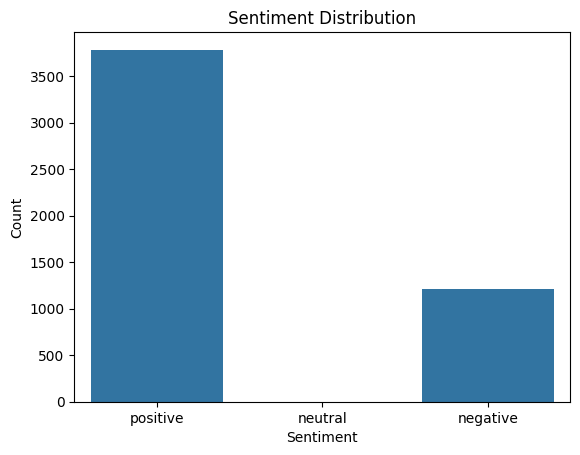

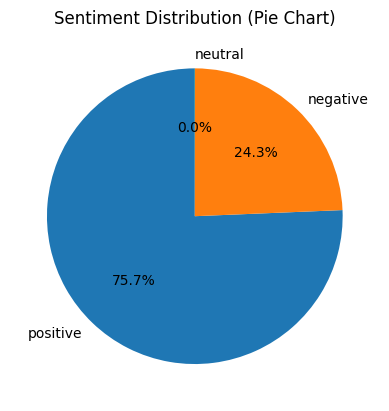

In [1]:
!pip install pandas matplotlib seaborn textblob nltk

import nltk
nltk.download('vader_lexicon')

from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_sentiment(text):
    if not text or not isinstance(text, str) or text.strip() == "":
        return None, None
    try:
      blob = TextBlob(text)
      polarity = blob.sentiment.polarity
      if polarity > 0:
          sentiment = "positive"
      elif polarity < 0:
          sentiment = "negative"
      else:
          sentiment = "neutral"
      scores = {"positive": max(0, polarity), "negative": max(0, -polarity), "neutral": 1 - abs(polarity)}
      return sentiment, scores
    except Exception as e:
      print(f"Error in sentiment analysis: {e}")
      return None, None

# Load data from CSV
try:
    df = pd.read_csv("your_sentiment_data.csv")  # Replace with your CSV file name
except FileNotFoundError:
    print("Error: your_sentiment_data.csv not found. Please upload it to Colab.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: your_sentiment_data.csv is empty.")
    exit()
except pd.errors.ParserError:
    print("Error: Could not parse your_sentiment_data.csv. Check the file format.")
    exit()

try:
    texts = df['text'].tolist()
except KeyError:
    print("Error: Column 'text' not found in your_sentiment_data.csv")
    exit()

results = []
for text in texts:
    sentiment, scores = analyze_sentiment(text)
    if sentiment:
        results.append({"text": text, "sentiment": sentiment, "positive": scores["positive"], "negative": scores["negative"], "neutral": scores["neutral"]})

df_results = pd.DataFrame(results)
print(df_results)

# Create the count plot (bar chart)
sns.countplot(x='sentiment', data=df_results, order=["positive", "neutral", "negative"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment") # Add x-axis label
plt.ylabel("Count") # Add y-axis label
plt.show()

# Create pie chart
sentiment_counts = df_results['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Distribution (Pie Chart)")
plt.show()